In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

In [2]:
train = pd.read_csv("I:/train.csv")
test = pd.read_csv("I:/test.csv")
train_notarget = train.drop(["Survived"], axis=1)
complete = train_notarget.append(test, ignore_index=True)

# Veri temizliği

In [3]:
#Yaştaki NaN değerleri veri setinin yaş ortalamasıyla doldurmak ideal gibi

#Kabin kolonunu düşürmek gerek, herhangi bir imputation metodu uygulamak için çok az kullanılabilir veri var

#Embarked kolonundaki iki NaN satırı düşürmek gerek
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
train.dropna(subset=["Embarked"], inplace=True)
train.drop("Cabin", axis=1, inplace=True)

In [7]:
#Yaş sütunu hariç her sütunda 889 satır var, Age sütununu da ortalamalarla doldurunca 889 olacak
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [8]:
#Yaş sütununu da ortalama yaşı kullanarak doldurdum
mean_age = train.Age.mean()
train.fillna(value=mean_age, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [9]:
#Object veri tiplerini int64'e çevirerek matematiksel işlem yapılabilecek hale getirdim.
train.replace({"male":0, "female":1}, inplace = True)
train.replace({"S":0, "C":1, "Q":2}, inplace = True)

In [10]:
#Yolcu isimleri ve bilet kodları algoritma tarafından kullanılabilecek sayısal girdilere çevrilemez, bu yüzden düşürülmesi gerek.
#Ayrıca PassengerId sütununun da her ne kadar int64 olsa da yorumlanabilir (en azından benim yorumlayabileceğim) bir sayısal değer olmamasından ötürü düşürülmesi şart.
train.drop(["Ticket", "PassengerId"], axis=1, inplace=True)

In [11]:
#Veri temiz ve işlenmeye hazır duruyor.
train.info()
train.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    int64  
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 69.5+ KB


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Feature engineering

In [12]:
#Boş bir küme oluşturup train veri setindeki tüm isimleri tarayıp virgülle ayrıldıktan sonra
#ikinci sırada gelen sözcüğü bu boş kümeye eklettim. Yani kişinin unvanını. Ardından unvanın
#sonundaki noktayı kaldırdım.
titles = set()
for name in train["Name"]:
    titles.add(name.split(",")[1].split(".")[0].strip())

#Kümedeki unvanları gemi memurları, asiller, kadın ve erkekler olacak şekilde dictionary içerisinde
#sınıflara ayırdım.
title_dict = {'Capt':"Officer",
 'Col':"Officer",
 'Don':"Royal",
 'Dr':"Officer",
 'Jonkheer':"Royal",
 'Lady':"Royal",
 'Major':"Officer",
 'Master':"Royal",
 'Miss':"Mrs",
 'Mlle':"Mrs",
 'Mme':"Mrs",
 'Mr':"Mr",
 'Mrs':"Mrs",
 'Ms':"Mrs",
 'Rev':"Officer",
 'Sir':"Royal",
 'the Countess':"Royal"}

#Ardından bu sınıfları veri setindeki unvanlara uygulayarak title adında yeni bir feature kolonu oluşturdum.
train["title"] = train["Name"].map(lambda name: name.split(",")[1].split(".")[0].strip())
train["title"] = train["title"].map(title_dict)
train.title.value_counts()
train.replace({"Mr":1, "Mrs":2, "Royal":3, "Officer":4}, inplace=True)

In [13]:
#Kadınlar ve çocuklar daha fazla hayatta kaldığından 
#yaş ortalamasının altındaki kadınları gösteren bir kolon
#belki bir şeyler anlatabilir.
train["young_female"] = (train["Age"] <= train.Age.mean()) & (train["Sex"] == 1)
train["young_female"] = train["young_female"].astype("int64")
train.young_female.isna().value_counts()

False    889
Name: young_female, dtype: int64

In [14]:
#Yukarıdaki hücre ile aynı işlem sayılır, yalnızca "ve" operatörünü "veya" ile
#değiştirdim. Yani gemidekilerin ortalama yaşında ya da ortalamadan daha genç
#kişiler veya kadın olanları barındıran bir kolon ekledim. 
train["young_or_female"] = (train["Age"] <= train.Age.mean()) | (train["Sex"] == 1)
train["young_or_female"] = train["young_or_female"].astype("int64")
train.young_or_female.isna().value_counts()

False    889
Name: young_or_female, dtype: int64

In [15]:
#Kişilerin gemide kaç akrabası (çocuk ve eş/kardeş) olduğunu gösteren bir kolon oluşturdum 
train["family_count"] = train["SibSp"] + train["Parch"]
train["family_count"].astype("int64")
train.family_count.value_counts()

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_count, dtype: int64

In [16]:
#Gemide akrabası olanların yaşam oranıyla alakalı bir farklılık olabilir.
train["has_family"] = (train["SibSp"] + train["Parch"]) > 0
train["has_family"].astype("int64")
train.has_family.value_counts()

False    535
True     354
Name: has_family, dtype: int64

In [17]:
#Gemide akrabası olmayanların da yaşam oranıyla alakalı bir farklılık olabilir.
train["no_family"] = (train["SibSp"] + train["Parch"]) <= 0
train["no_family"].astype("int64")
train.has_family.value_counts()

False    535
True     354
Name: has_family, dtype: int64

In [18]:
#Gemideki ortalama aile bireyi sayısının üzerinde akrabası olanları gösteren bir kolon oluşturdum.
train["crowded_family"] = train["family_count"] > train["family_count"].mean()
train["crowded_family"].astype("int64")
train.crowded_family.value_counts()

False    535
True     354
Name: crowded_family, dtype: int64

In [19]:
#Yolcuların sınıfı ve yaşları arasında negatif bir korelasyon var, yani genç yolcular genelde
#daha alt sınıflardan bilet almışlar. Buna karşın, genç yolcuların gemiden öncelikli biçimde
#tahliye edildiği verisine de sahibiz. Bu çelişen iki girdiyi tek bir kolonda topladım.
train["age_and_class"] = (train["Age"] <= train.Age.mean()) | (train["Pclass"] == 1)
train["age_and_class"] = train["age_and_class"].astype("int64")
train.age_and_class.isna().value_counts()

False    889
Name: age_and_class, dtype: int64

In [20]:
#Gemiye bindikleri yere göre en çok ölüm Southampton'dan çıkmış. Southampton'dan
#binenleri gösteren bir kolon oluşturdum.
train["embarkloc"] = (train["Embarked"] == 0)
train["embarkloc"] = train["embarkloc"].astype("int64")
train.embarkloc.isna().value_counts()

False    889
Name: embarkloc, dtype: int64

In [21]:
#Yolcuların sınıfı ve yaşları arasında negatif bir korelasyon var, yani genç yolcular genelde
#daha alt sınıflardan bilet almışlar. Buna karşın, genç yolcuların gemiden öncelikli biçimde
#tahliye edildiği verisine de sahibiz. Bu çelişen iki girdiyi tek bir kolonda topladım.
train["high_fare"] = (train["Fare"] >= train.Fare.mean()) | (train["Pclass"] == 1)
train["high_fare"] = train["high_fare"].astype("int64")
train.high_fare.isna().value_counts()

False    889
Name: high_fare, dtype: int64

# Veri görselleştirme

Text(0.5, 1.0, 'Kolonların korelasyon matrisi')

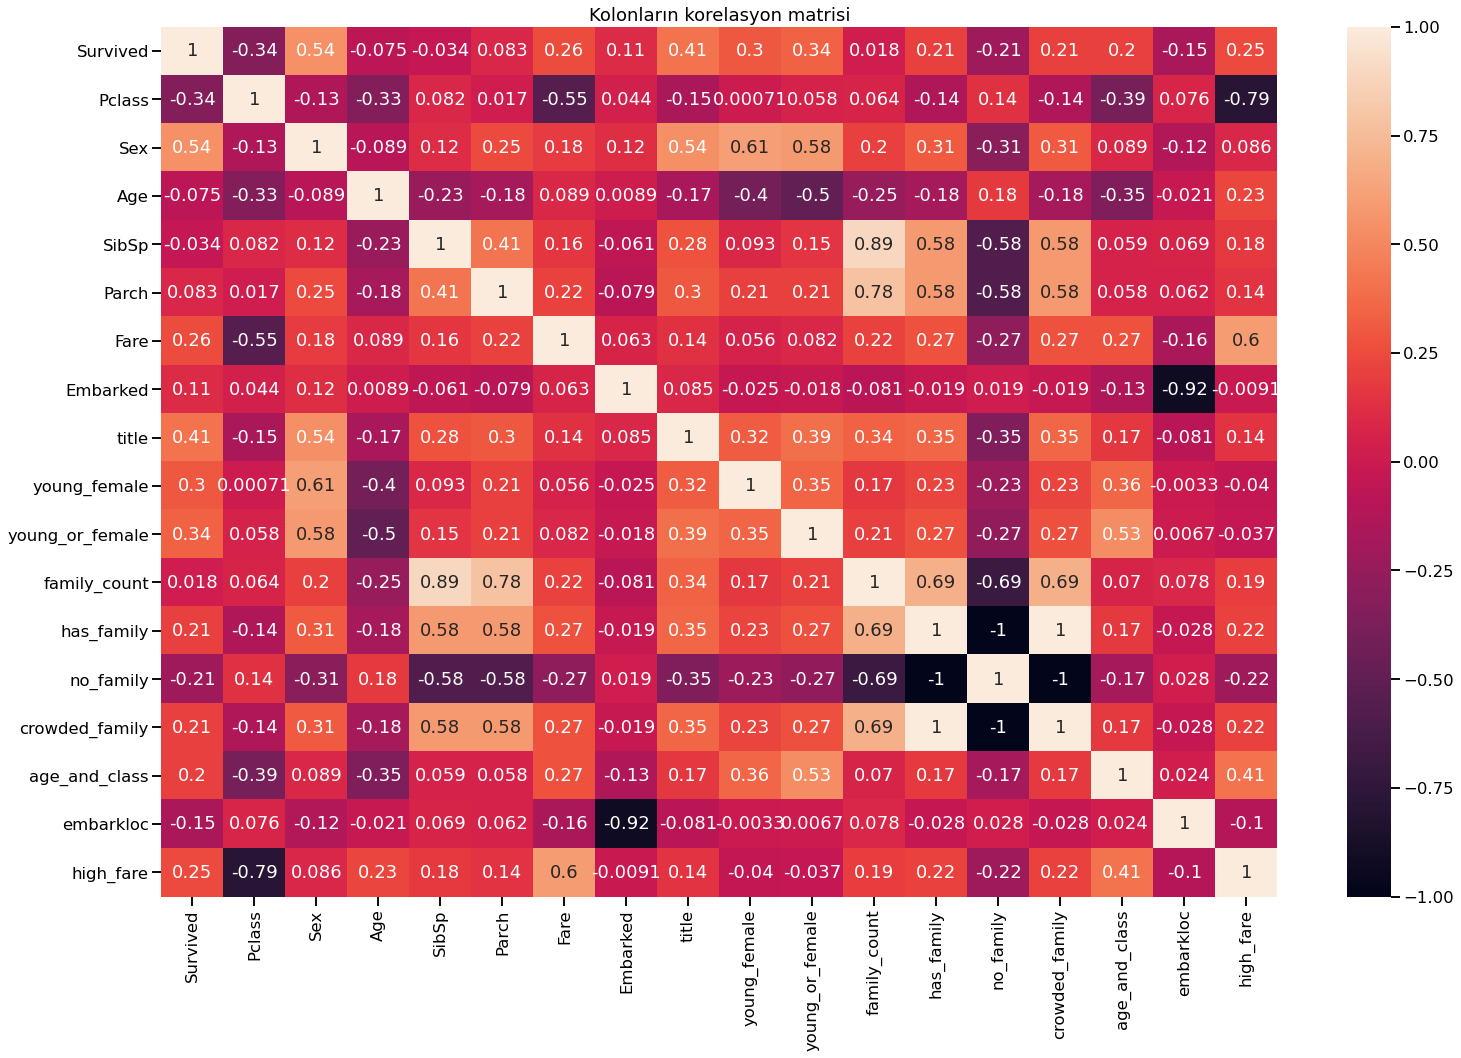

In [22]:
#Korelasyon matrisini çizelim
sns.set_context("talk")
ax = plt.subplots(figsize=(25, 16))
sns.heatmap(train.corr(), annot=True)
plt.title("Kolonların korelasyon matrisi")

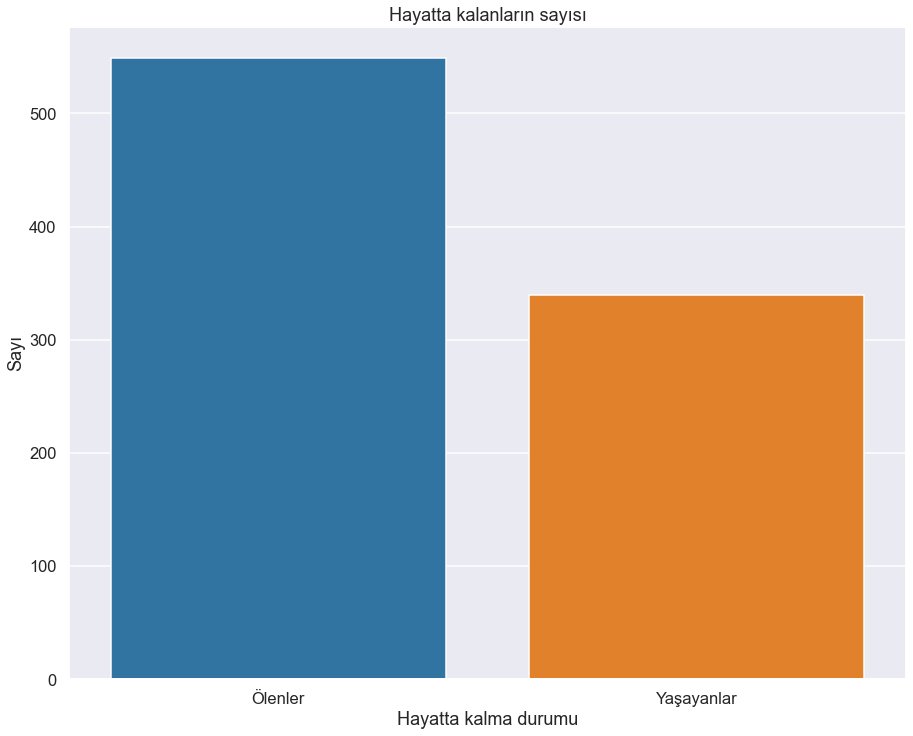

In [23]:
#Hayatta kalan ve ölenlerin sayısı
sns.set_context("talk")
sns.set_style("darkgrid")
plt.figure(figsize=(15, 12))
g = sns.countplot("Survived", data=train)
plt.title("Hayatta kalanların sayısı")
plt.xlabel("Hayatta kalma durumu")
plt.ylabel("Sayı")
g.set_xticklabels(["Ölenler", "Yaşayanlar"])
plt.show()

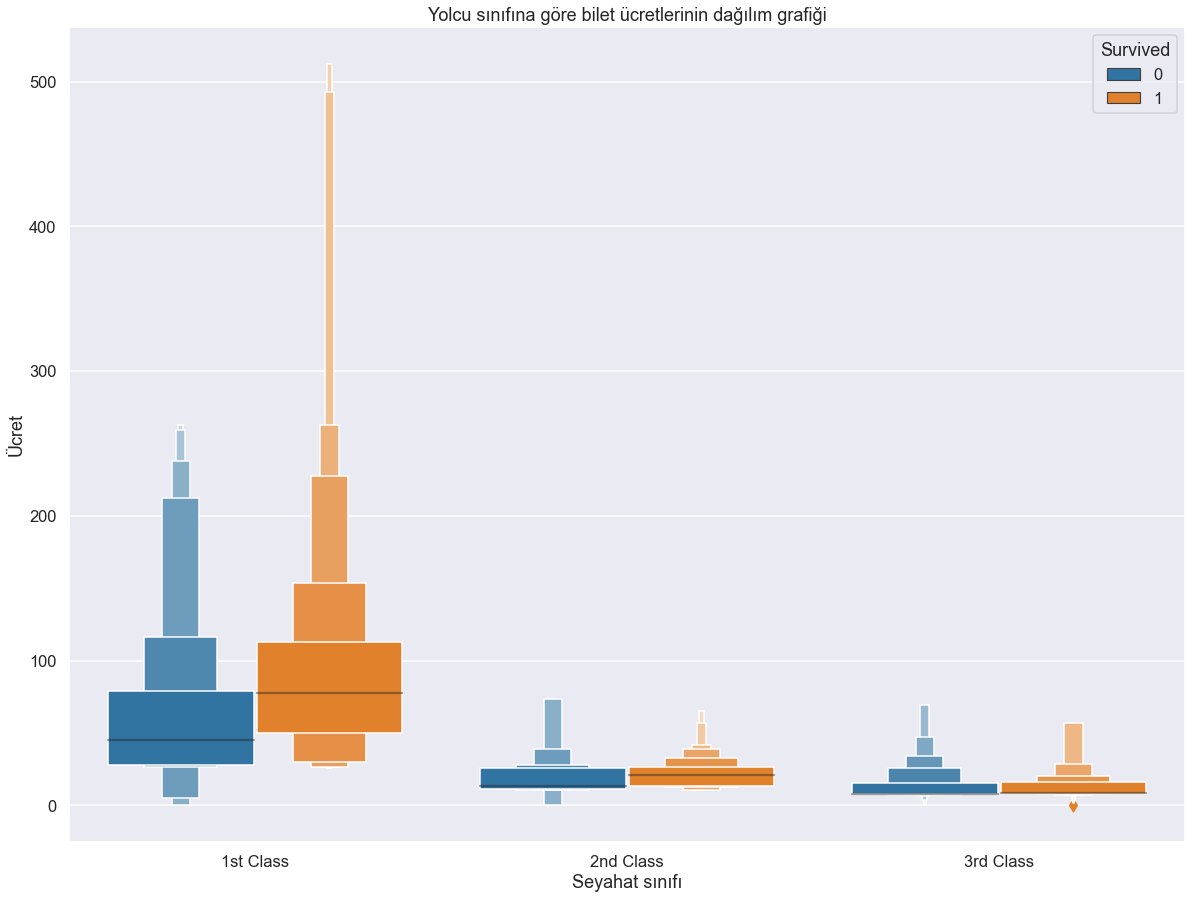

In [24]:
#Yolcuların hangi sınıfta seyahat ettiğine göre bilete ödedikleri ücretin dağılımını gösteren kutu grafiği
sns.set_context("talk")
plt.figure(figsize=(20, 15))
g1 = sns.boxenplot("Pclass", "Fare", hue="Survived", data=train)
g1.set_xticklabels(["1st Class", "2nd Class", "3rd Class"])
plt.title("Yolcu sınıfına göre bilet ücretlerinin dağılım grafiği")
plt.ylabel("Ücret")
plt.xlabel("Seyahat sınıfı")
plt.show()

Text(0, 0.5, 'Hayatta kalma yüzdeleri')

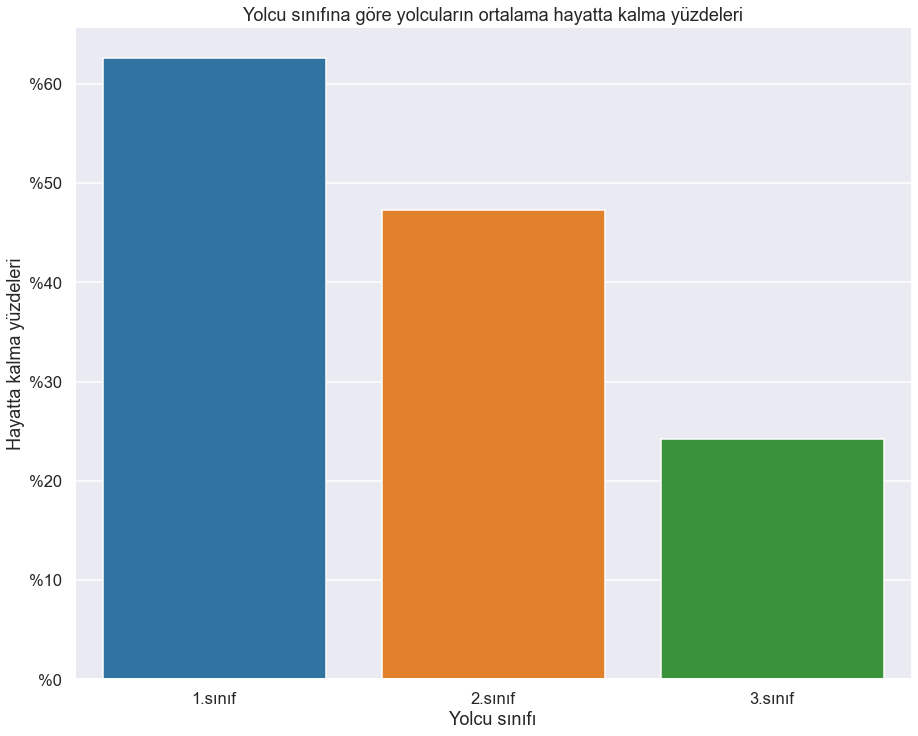

In [25]:
#Yolcuların seyahat sınıfına göre hayatta kalma yüzdeleri
sns.set_context("talk")
plt.figure(figsize=(15, 12))
g = sns.barplot("Pclass", "Survived", data=train, ci=None)
g.set_yticklabels(["%0", "%10", "%20", "%30", "%40", "%50", "%60", "%70"])
g.set_xticklabels(["1.sınıf", "2.sınıf", "3.sınıf"])
plt.title("Yolcu sınıfına göre yolcuların ortalama hayatta kalma yüzdeleri")
plt.xlabel("Yolcu sınıfı")
plt.ylabel("Hayatta kalma yüzdeleri")

Text(0.5, 0, 'Cinsiyet')

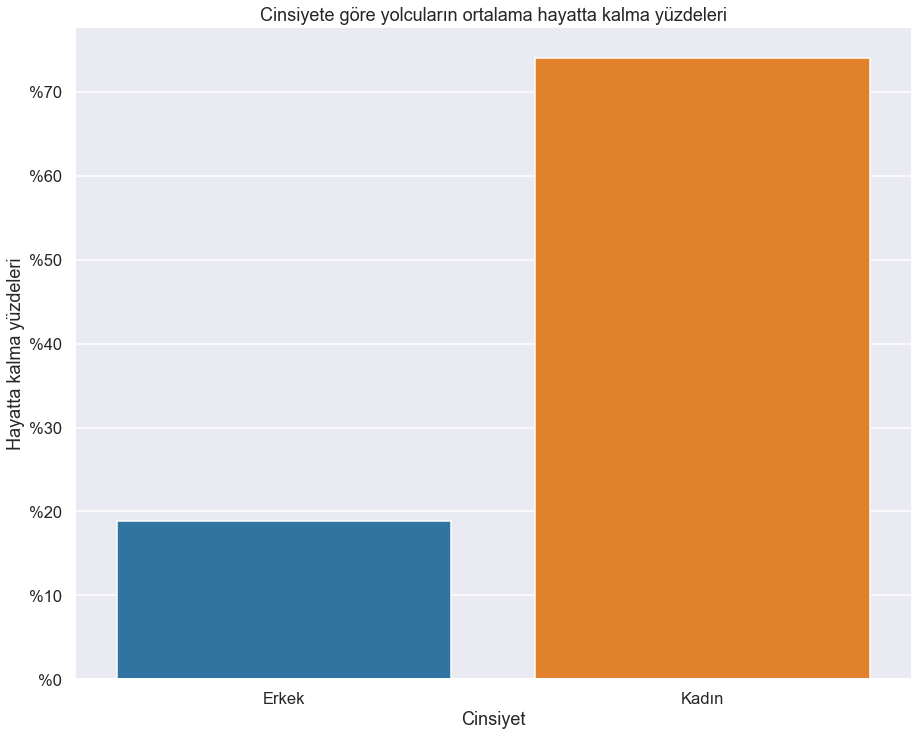

In [26]:
#Hayatta kalanların cinsiyete göre yüzdesel dağılımı
sns.set_context("talk")
plt.figure(figsize=(15, 12))
g = sns.barplot("Sex", "Survived", data=train, ci=None)
g.set_yticklabels(["%0", "%10", "%20", "%30", "%40", "%50", "%60", "%70", "%80"])
g.set_xticklabels(["Erkek", "Kadın"])
plt.title("Cinsiyete göre yolcuların ortalama hayatta kalma yüzdeleri")
plt.ylabel("Hayatta kalma yüzdeleri")
plt.xlabel("Cinsiyet")

Text(0, 0.5, 'Yaş')

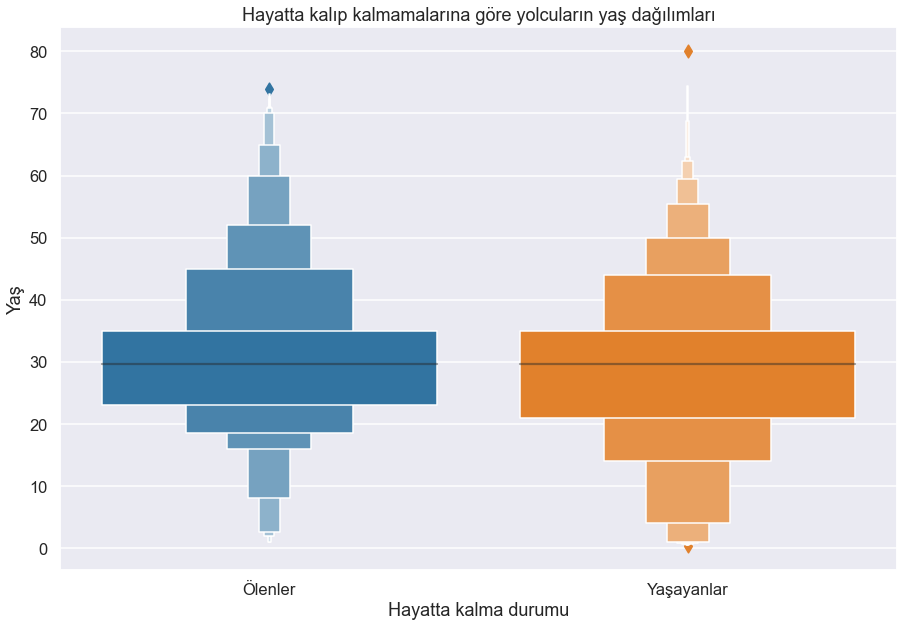

In [27]:
#Yolcuların hayatta kalma durumlarına göre yaşlarının dağılımını gösteren kutu grafiği
sns.set_context("talk")
plt.figure(figsize=(15, 10))
a = sns.boxenplot("Survived", "Age", data=train)
a.set_xticklabels(["Ölenler", "Yaşayanlar"])
plt.title("Hayatta kalıp kalmamalarına göre yolcuların yaş dağılımları")
plt.xlabel("Hayatta kalma durumu")
plt.ylabel("Yaş")

Text(0.5, 0, 'Hayatta kalma durumu')

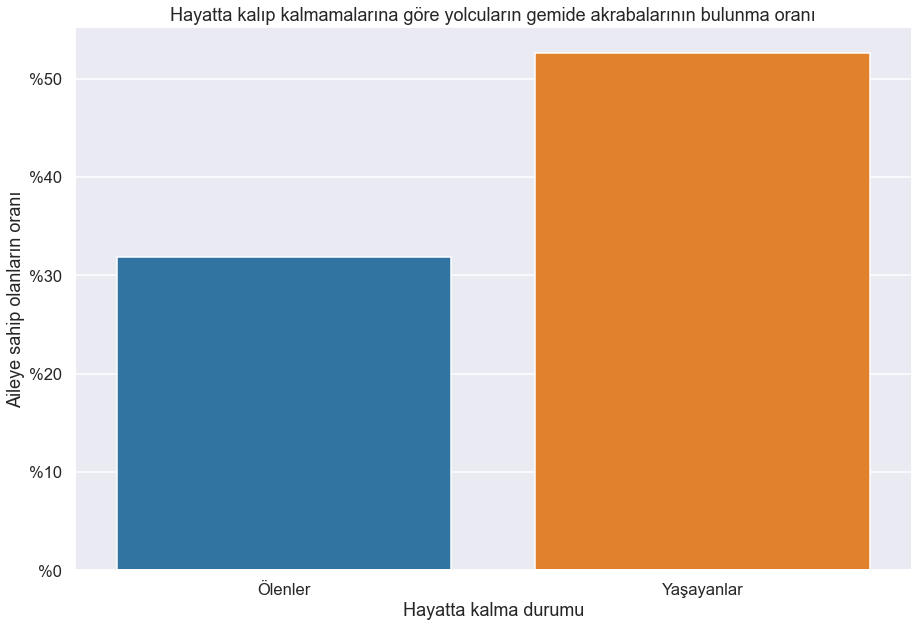

In [28]:
#Hayatta kalan ve ölen yolcuların gemideki akrabası olan ve olmayanların oranını gösteren kutu grafiği
sns.set_context("talk")
plt.figure(figsize=(15, 10))
a = sns.barplot("Survived", "has_family", data=train, ci=None)
a.set_yticklabels(["%0", "%10", "%20", "%30", "%40", "%50", "%60"])
a.set_xticklabels(["Ölenler", "Yaşayanlar"])
plt.title("Hayatta kalıp kalmamalarına göre yolcuların gemide akrabalarının bulunma oranı")
plt.ylabel("Aileye sahip olanların oranı")
plt.xlabel("Hayatta kalma durumu")

Text(0.5, 0, 'Hayatta kalma durumu')

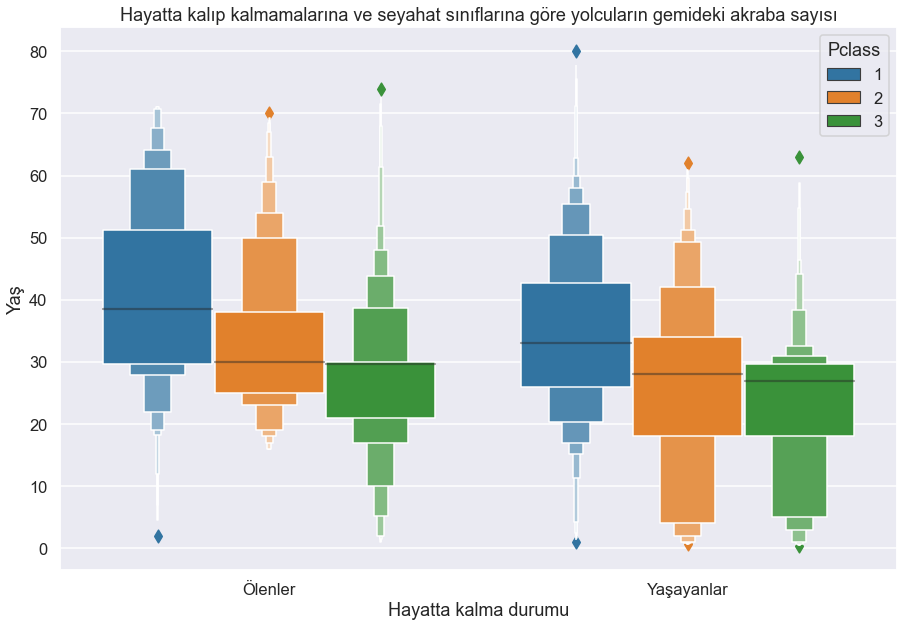

In [29]:
#Yolcuların seyahat sınıflarına ve hayatta kalıp kalmama durumlarına göre yaşlarının dağılımını gösteren kutu grafiği
sns.set_context("talk")
plt.figure(figsize=(15, 10))
a = sns.boxenplot("Survived", "Age", hue="Pclass", data=train)
a.set_xticklabels(["Ölenler", "Yaşayanlar"])
plt.title("Hayatta kalıp kalmamalarına ve seyahat sınıflarına göre yolcuların gemideki akraba sayısı")
plt.ylabel("Yaş")
plt.xlabel("Hayatta kalma durumu")

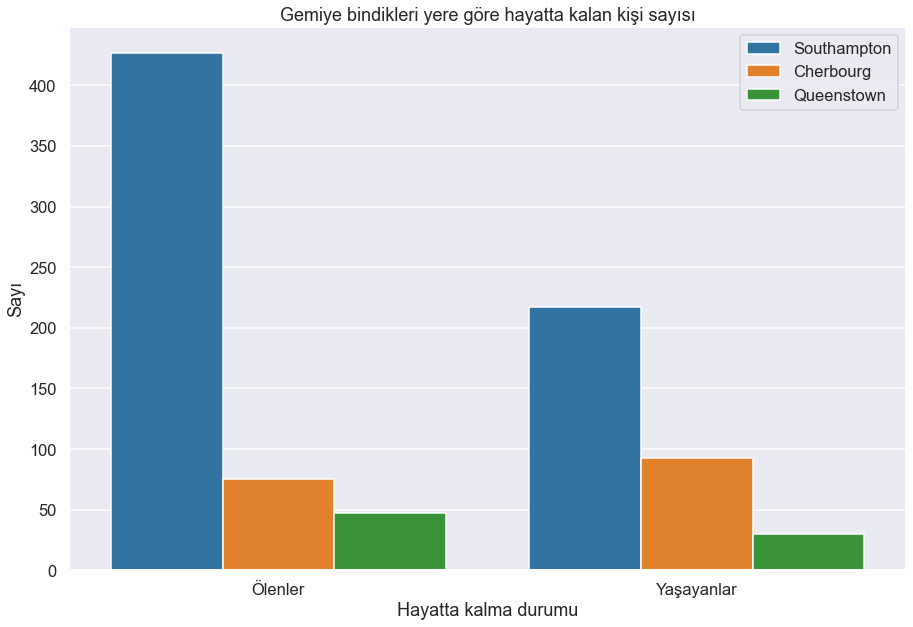

In [30]:
#Yolcuların seyahat sınıflarına ve hayatta kalıp kalmama durumlarına göre yaşlarının dağılımını gösteren kutu grafiği
sns.set_context("talk")
ax = plt.subplots(figsize=(15, 10))
a = sns.countplot("Survived", hue="Embarked", data=train)
a.set_xticklabels(["Ölenler", "Yaşayanlar"])
plt.title("Gemiye bindikleri yere göre hayatta kalan kişi sayısı")
plt.ylabel("Sayı")
plt.xlabel("Hayatta kalma durumu")
plt.legend(["Southampton", "Cherbourg", "Queenstown"])
plt.show()

# Algoritmanın kurulması

In [31]:
#Veri setini X ve y şeklinde ayırarak tahmin edilecek değer olan Survived kolonunu ayıralım
X = train[["Fare", "Pclass", "Sex", "Age", "high_fare", "age_and_class", "crowded_family", "has_family", "no_family", "title"]]
y = np.array(train.Survived)

#Veriyi eğitim ve test setlerine bölelim 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

#Verideki değerleri farklı yaklaşımlarla ölçeklendirerek modelin daha doğru tahminler yapmasını ve 
#sayısal değerlerin ağırlıklarını yanlış belirlemesini engelleyebiliriz.
rob_scaler = RobustScaler()
rob_x = rob_scaler.fit_transform(X_train)
rob_xtest = rob_scaler.transform(X_test)
minmax_scaler = MinMaxScaler()
minmax_x = minmax_scaler.fit_transform(X_train)
minmax_xtest = minmax_scaler.transform(X_test)
std_scaler = StandardScaler().fit(X_train)
standard_x = std_scaler.transform(X_train)
standard_xtest = std_scaler.transform(X_test)

In [32]:
#k-NN modelini kuralım
knn = KNeighborsClassifier()

#En iyi k-NN modelini belirlemek için 1'den 30'a kadar n_neighbors parametresine
#değerler atayarak en iyi parametreyi bulalım. Burada standardize etme yöntemiyle
#ölçeklendirme yaklaşımını kullandım.
params = {"n_neighbors":np.arange(1, 31)}
grid_std = GridSearchCV(estimator = knn, param_grid = params, cv=5)
grid_std.fit(standard_x, y_train)
knn_pred_std = grid_std.predict(standard_xtest)
print(classification_report(y_test, knn_pred_std))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       167
           1       0.70      0.76      0.73       100

    accuracy                           0.79       267
   macro avg       0.77      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [33]:
#En iyi k-NN modelini belirlemek için 1'den 30'a kadar n_neighbors parametresine
#değerler atayarak en iyi parametreyi bulalım. Burada MinMax ölçeklendirmesi
#yapmayı denedim.
params = {"n_neighbors":np.arange(1, 31)}
grid_minmax = GridSearchCV(estimator = knn, param_grid = params, cv=5)
grid_minmax.fit(minmax_x, y_train)
knn_pred_minmax = grid_minmax.predict(minmax_xtest)
print(classification_report(y_test, knn_pred_minmax))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       167
           1       0.80      0.59      0.68       100

    accuracy                           0.79       267
   macro avg       0.79      0.75      0.76       267
weighted avg       0.79      0.79      0.78       267



In [34]:
#En iyi k-NN modelini belirlemek için 1'den 30'a kadar n_neighbors parametresine
#değerler atayarak en iyi parametreyi bulalım. Burada ise robust ölçeklendirme
#yaklaşımını denedim.
params = {"n_neighbors":np.arange(1, 31)}
grid_rob = GridSearchCV(estimator = knn, param_grid = params, cv=5)
grid_rob.fit(rob_x, y_train)
knn_pred_rob = grid_rob.predict(rob_xtest)
print(classification_report(y_test, knn_pred_rob))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       167
           1       0.71      0.75      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



Text(0.5, 1.0, 'k-NN Algoritmasının Sınıflandırma Performansı (Standard)')

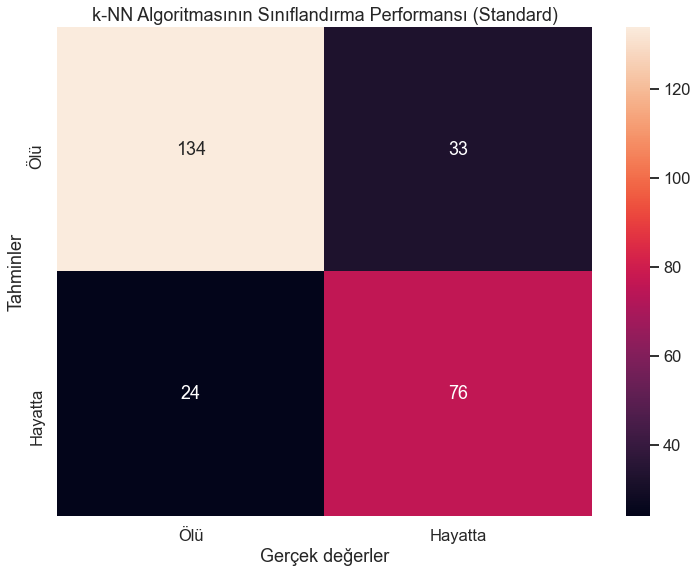

In [35]:
#k-NN modelinin (standart ölçeklendirme) hata matrisini çizelim.
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, knn_pred_std), annot=True, xticklabels=["Ölü", "Hayatta"], yticklabels=["Ölü", "Hayatta"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("k-NN Algoritmasının Sınıflandırma Performansı (Standard)")

Text(0.5, 1.0, 'k-NN Algoritmasının Sınıflandırma Performansı (MinMax)')

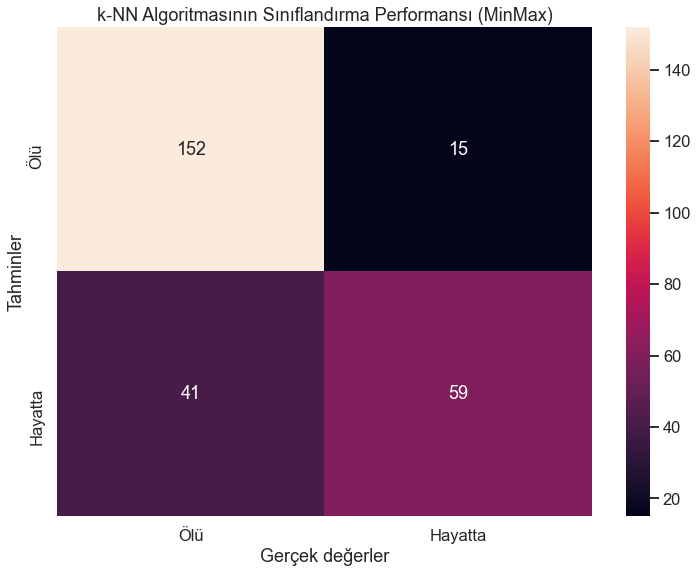

In [36]:
#k-NN modelinin (MinMax ölçeklendirme) hata matrisini çizelim.
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, knn_pred_minmax), annot=True, xticklabels=["Ölü", "Hayatta"], yticklabels=["Ölü", "Hayatta"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("k-NN Algoritmasının Sınıflandırma Performansı (MinMax)")

Text(0.5, 1.0, 'k-NN Algoritmasının Sınıflandırma Performansı (Robust)')

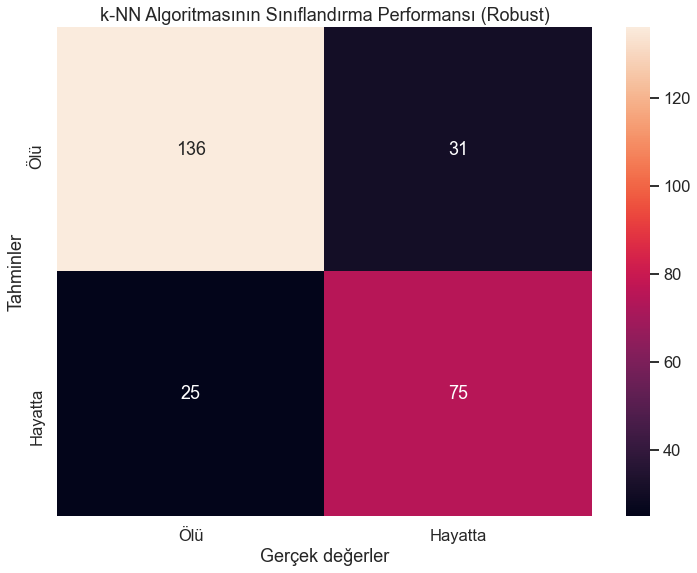

In [37]:
#k-NN modelinin (robust ölçeklendirme) hata matrisini çizelim.
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, knn_pred_rob), annot=True, xticklabels=["Ölü", "Hayatta"], yticklabels=["Ölü", "Hayatta"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("k-NN Algoritmasının Sınıflandırma Performansı (Robust)")

In [38]:
#Sırasıyla standart, minmax ve robust ölçeklendirme metotları uygulanmış k-NN modellerinin puanlandırmalarını yazdırdım.

print("En yüksek puan (standardize, minmax, robust):", grid_std.best_score_, grid_minmax.best_score_, grid_rob.best_score_)
print("En iyi n_neighbors parametresi (standardize, minmax, robust):",grid_std.best_estimator_.n_neighbors, grid_minmax.best_estimator_.n_neighbors, grid_rob.best_estimator_.n_neighbors)
print("Ortalama model puanı (standardize, minmax, robust):", grid_std.cv_results_["mean_test_score"].mean(), grid_minmax.cv_results_["mean_test_score"].mean(), grid_rob.cv_results_["mean_test_score"].mean())

En yüksek puan (standardize, minmax, robust): 0.8199870967741936 0.8150193548387096 0.8135354838709677
En iyi n_neighbors parametresi (standardize, minmax, robust): 1 2 1
Ortalama model puanı (standardize, minmax, robust): 0.7913698924731185 0.791392258064516 0.7810559139784947


In [39]:
#k-NN modeli için yaptığım şeylerin aynısını Lojistik Regresyon ile denedim.
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=3)
params_log = {"estimator__C":[0.0001, 0.001, 0.01, 0.1, 1, 1.2, 1.5, 1.8, 2, 2.2, 2.5, 2.7, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.9, 3, 3.1, 3.3, 3.5, 3.8, 10, 100]}
grid_log_std = GridSearchCV(estimator=rfe, param_grid = params_log, cv=5)
grid_log_std.fit(standard_x, y_train)
logreg_pred_std = grid_log_std.predict(standard_xtest)
print(classification_report(y_test, logreg_pred_std))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       167
           1       0.67      0.76      0.71       100

    accuracy                           0.77       267
   macro avg       0.76      0.77      0.76       267
weighted avg       0.78      0.77      0.77       267



In [40]:
grid_log_minmax = GridSearchCV(estimator=rfe, param_grid = params_log, cv=5)
grid_log_minmax.fit(minmax_x, y_train)
logreg_pred_minmax = grid_log_minmax.predict(minmax_xtest)
print(classification_report(y_test, logreg_pred_minmax))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       167
           1       0.69      0.74      0.71       100

    accuracy                           0.78       267
   macro avg       0.76      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



In [41]:
grid_log_rob = GridSearchCV(estimator=rfe, param_grid = params_log, cv=5)
grid_log_rob.fit(rob_x, y_train)
logreg_pred_rob = grid_log_rob.predict(rob_xtest)
print(classification_report(y_test, logreg_pred_rob))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       167
           1       0.67      0.76      0.71       100

    accuracy                           0.77       267
   macro avg       0.76      0.77      0.76       267
weighted avg       0.78      0.77      0.77       267



Text(0.5, 1.0, 'Lojistik Regresyon Algoritmasının Sınıflandırma Performansı (Standard)')

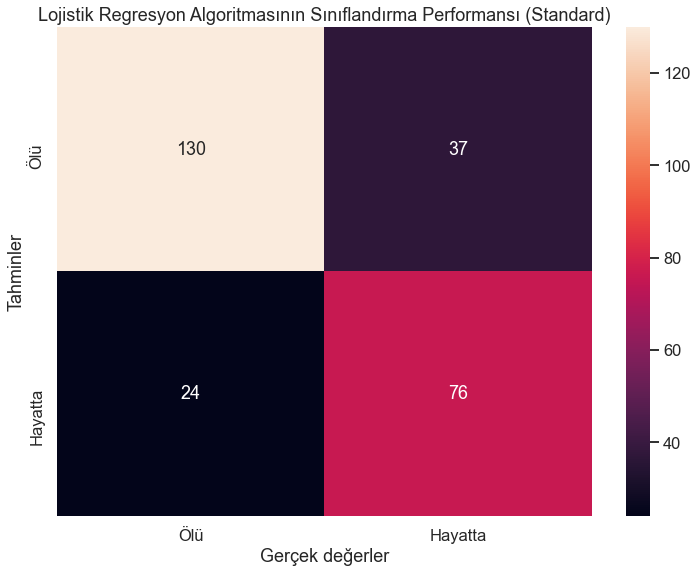

In [42]:
#Lojistik Regresyon modelinin (standart ölçeklendirme) hata matrisi
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, logreg_pred_std), annot=True, xticklabels=["Ölü", "Hayatta"], yticklabels=["Ölü", "Hayatta"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("Lojistik Regresyon Algoritmasının Sınıflandırma Performansı (Standard)")

Text(0.5, 1.0, 'Lojistik Regresyon Algoritmasının Sınıflandırma Performansı (MinMax)')

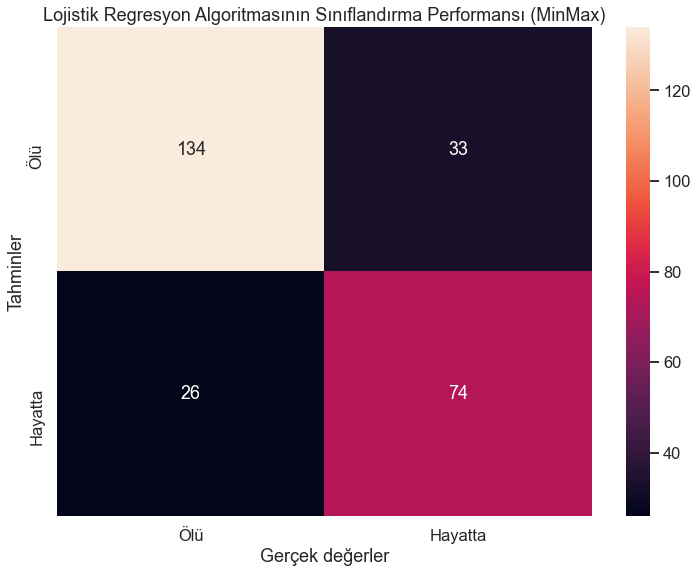

In [43]:
#Lojistik Regresyon modelinin (minmax ölçeklendirme) hata matrisi
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, logreg_pred_minmax), annot=True, xticklabels=["Ölü", "Hayatta"], yticklabels=["Ölü", "Hayatta"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("Lojistik Regresyon Algoritmasının Sınıflandırma Performansı (MinMax)")

Text(0.5, 1.0, 'Lojistik Regresyon Algoritmasının Sınıflandırma Performansı (Robust)')

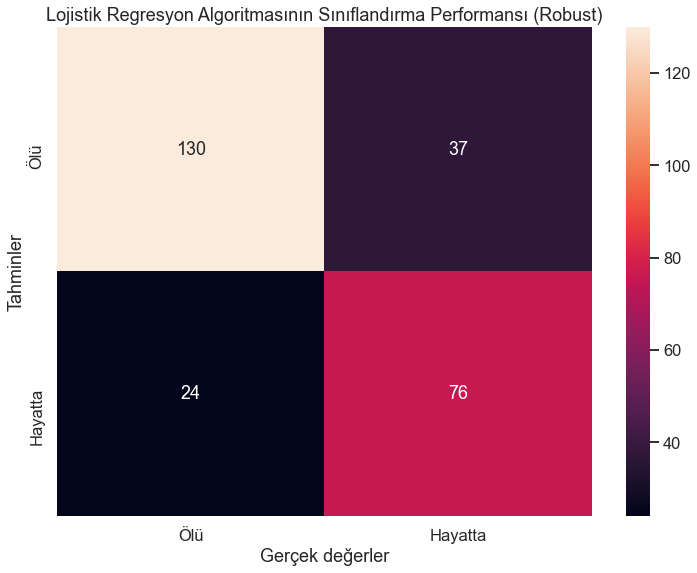

In [44]:
#Lojistik Regresyon modelinin (robust ölçeklendirme) hata matrisi
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, logreg_pred_rob), annot=True, xticklabels=["Ölü", "Hayatta"], yticklabels=["Ölü", "Hayatta"], fmt="g")
plt.ylabel("Tahminler")
plt.xlabel("Gerçek değerler")
plt.title("Lojistik Regresyon Algoritmasının Sınıflandırma Performansı (Robust)")

In [45]:
#Lojistik Regresyon modeli için sırasıyla farklı ölçeklendirme metotlarının uygulanması sonucu elde edilen puanları yazdırdım.

print("En yüksek puan (standardize, minmax, robust):", grid_log_std.best_score_, grid_log_minmax.best_score_, grid_log_rob.best_score_)
print("En iyi C parametresi (standardize, minmax, robust):",grid_log_std.best_estimator_.estimator_, grid_log_minmax.best_estimator_.estimator_, grid_log_rob.best_estimator_.estimator_)
print("Ortalama model puanı (standardize, minmax, robust):", grid_log_std.cv_results_["mean_test_score"].mean(), grid_log_minmax.cv_results_["mean_test_score"].mean(), grid_log_rob.cv_results_["mean_test_score"].mean())

En yüksek puan (standardize, minmax, robust): 0.7941806451612903 0.7893548387096774 0.7957935483870967
En iyi C parametresi (standardize, minmax, robust): LogisticRegression(C=0.1) LogisticRegression(C=0.1) LogisticRegression(C=0.1)
Ortalama model puanı (standardize, minmax, robust): 0.7697333333333334 0.7617060931899643 0.7815622461170848


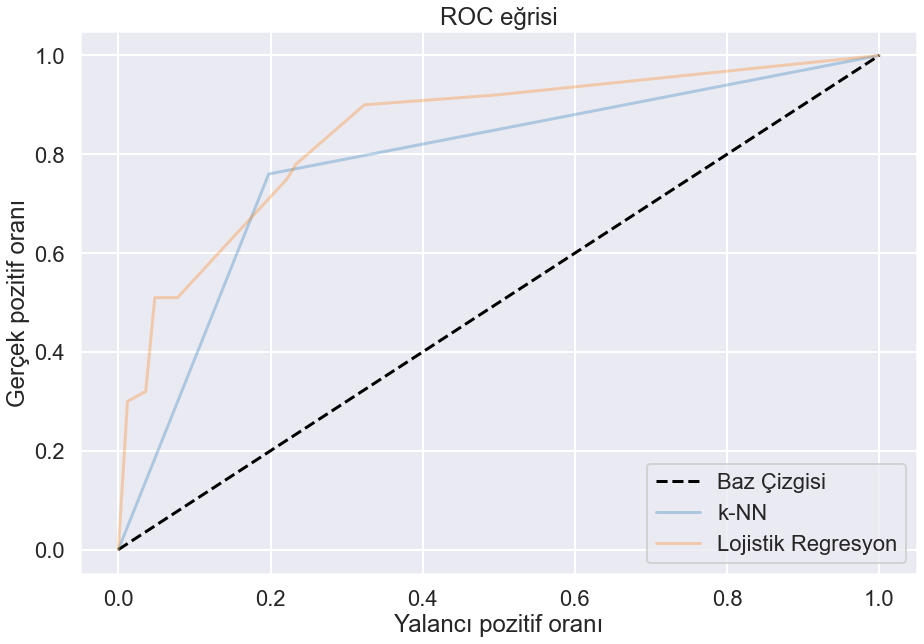

In [46]:
#Modellerin performansını daha iyi kıyaslayabilmek için ROC eğrisi çizdim. Bu noktadan sonra yapılan bütün model kullanımlarında
#k-NN modeli için standart ölçeklendirilmiş veriyi, Lojistik Regresyon modeli için ise robust metotla ölçeklendirilmiş veriyi
#girdi olarak tercih ettim.
knn_prob = grid_std.predict_proba(standard_xtest)[:, 1]
logreg_prob = grid_log_rob.predict_proba(standard_xtest)[:, 1]
fprlog, tprlog, thresholdslog = roc_curve(y_test, logreg_prob)
fpr, tpr, thresholds = roc_curve(y_test, knn_prob)
sns.set_style("darkgrid")
sns.set_context("poster")
ax = plt.subplots(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
sns.lineplot(fpr, tpr, alpha=0.3, ci=None)
sns.lineplot(fprlog, tprlog, alpha=0.3, ci=None)
plt.xlabel('Yalancı pozitif oranı')
plt.ylabel('Gerçek pozitif oranı')
plt.title('ROC eğrisi')
plt.legend(["Baz Çizgisi", "k-NN", "Lojistik Regresyon"])
plt.show()

## Test verisi üzerinde çalışma

In [47]:
#Yukarıda algoritmaları kurarken yapılanları etiketlenmemiş test.csv dosyası için tek adımda yapalım 
test.dropna(subset=["Embarked"], inplace=True)
test.drop("Cabin", axis=1, inplace=True)
mean_age_test = test.Age.mean()
test.fillna(value=mean_age_test, inplace=True)
test.replace({"male":0, "female":1}, inplace = True)
test.replace({"S":0, "C":1, "Q":2}, inplace = True)
test.drop(["Ticket"], axis=1, inplace=True)

In [48]:
titles_test = set()
for name in test["Name"]:
    titles_test.add(name.split(",")[1].split(".")[0].strip())

title_dict_test = {'Capt':"Officer",
 'Col':"Officer",
 'Don':"Royal",
 'Dona':"Royal",
 'Dr':"Officer",
 'Jonkheer':"Royal",
 'Lady':"Royal",
 'Major':"Officer",
 'Master':"Royal",
 'Miss':"Mrs",
 'Mlle':"Mrs",
 'Mme':"Mrs",
 'Mr':"Mr",
 'Mrs':"Mrs",
 'Ms':"Mrs",
 'Rev':"Officer",
 'Sir':"Royal",
 'the Countess':"Royal"}
    
test["title"] = test["Name"].map(lambda name: name.split(",")[1].split(".")[0].strip())
test["title"] = test["title"].map(title_dict_test)
test.replace({"Mr":1, "Mrs":2, "Royal":3, "Officer":4}, inplace=True)
test.title.isna().value_counts()

False    418
Name: title, dtype: int64

In [49]:
#Burada ve aşağıdaki tüm hücrelerde dikkat çekmek istediğim bir nokta var. Mantık operatörleri
#kullanarak yaptığım tüm filtrelemelerde, örneğin yaş gibi sayısal bir kolonun ortalamasını
#kullanırken sadece eğitim ya da test veri setini değil, bunların ikisinin birleşiminden oluşan
#yaklaşık 1200 satırlık "complete" adı verdiğim tam bir veri seti kullandım. Böylece modelin
#daha iyi genelleme yapabileceğini düşündüm.

test["young_female"] = (test["Age"] <= complete.Age.mean()) & (test["Sex"] == 1)
test["young_female"] = test["young_female"].astype("int64")
test.young_female.isna().value_counts()

False    418
Name: young_female, dtype: int64

In [50]:
test["young_or_female"] = (test["Age"] <= complete.Age.mean()) | (test["Sex"] == 1)
test["young_or_female"] = test["young_or_female"].astype("int64")
test.young_or_female.isna().value_counts()

False    418
Name: young_or_female, dtype: int64

In [51]:
test["family_count"] = test["SibSp"] + test["Parch"]
test["family_count"].astype("int64")
test.family_count.isna().value_counts()

False    418
Name: family_count, dtype: int64

In [52]:
test["has_family"] = (test["SibSp"] + test["Parch"]) > 0
test["has_family"].astype("int64")
test.has_family.isna().value_counts()

False    418
Name: has_family, dtype: int64

In [53]:
#Gemide akrabası olanların yaşam oranıyla alakalı bir farklılık olabilir.
test["no_family"] = (test["SibSp"] + test["Parch"]) <= 0
test["no_family"].astype("int64")
test.has_family.isna().value_counts()

False    418
Name: has_family, dtype: int64

In [54]:
test["crowded_family"] = test["SibSp"] > complete.SibSp.mean()
test["crowded_family"] = test["crowded_family"].astype("int64")
test["crowded_family"].astype("int64")
test.crowded_family.isna().value_counts()

False    418
Name: crowded_family, dtype: int64

In [55]:
test["age_and_class"] = (test["Age"] <= complete.Age.mean()) | (test["Pclass"] == 1)
test["age_and_class"] = test["age_and_class"].astype("int64")
test["age_and_class"].isna().value_counts()

False    418
Name: age_and_class, dtype: int64

In [56]:
test["embarkloc"] = test["Embarked"] == 0
test["embarkloc"] = test["embarkloc"].astype("int64")
test.embarkloc.isna().value_counts()

False    418
Name: embarkloc, dtype: int64

In [57]:
test["crowded_family"] = test["family_count"] > test["family_count"].mean()
test["crowded_family"].astype("int64")
test.crowded_family.isna().value_counts()

False    418
Name: crowded_family, dtype: int64

In [58]:
X_test = test[["Fare", "Pclass", "Sex", "Age", "has_family", "no_family", "crowded_family", "title", "young_or_female", "young_female", "age_and_class", "embarkloc"]]

X = train[["Fare", "Pclass", "Sex", "Age", "has_family", "no_family", "crowded_family", "title", "young_or_female", "young_female", "age_and_class", "embarkloc"]]
y = np.array(train.Survived)

#k-NN için test verisinin standart ölçeklendirmesi
scaler = StandardScaler().fit(X)
scaler_test = StandardScaler().fit(X_test)
standard_x = scaler.transform(X)
standard_test = scaler_test.transform(X_test)

#Lojistik Regresyon için test verisinin robust ölçeklendirmesi
robust = RobustScaler().fit(X)
robust_test = RobustScaler().fit(X_test)
rob_x = robust.transform(X)
rob_test = robust_test.transform(X_test)

#Model metriklerini seçerken yukarıdaki eğitim veri setinin değerlendirmesinde bana en iyi sonuçları veren
#parametreleri kullandım.
knn = KNeighborsClassifier(n_neighbors=1)
logreg = LogisticRegression(C=0.1)

#Robust ölçeklendirme uygulanmış test veri setine Lojistik Regresyon modeli uygulanması
logreg.fit(rob_x, y)
logreg_pred = logreg.predict(rob_test)
test["Survived"] = logreg_pred
test_logreg = test[["PassengerId", "Survived"]].astype("int64")
test_logreg.to_csv("titanic_logreg.csv", index=False)

#Standart ölçeklendirme uygulanmış test veri setine k-NN modeli uygulanması
knn.fit(standard_x, y)
knn_pred = knn.predict(standard_test)
test["Survived"] = knn_pred
test_knn = test[["PassengerId", "Survived"]].astype("int64")
test_knn.to_csv("titanic_knn.csv", index=False)